# Comparison of QAOA CVaR (Max Cut)
In this notebook the QAOA method using the Conditional Value at risk (CVaR) is compared to the stadard QAOA for a max cut problem. 
# Importing necessary modules

In [1]:
#run: pip install openquantumcomputing
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

# Creating problem instance
Data for graph generation is found at https://github.com/OpenQuantumComputing/data

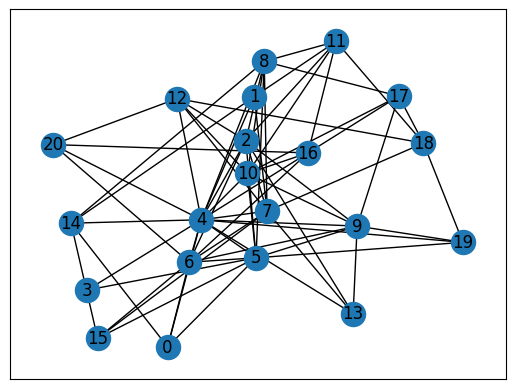

In [2]:
numV=21   #Number of vertices
G = nx.read_gml("/Users/olaib/QuantumComputing/Data/data/sample_graphs/w_ba_n"+str(numV)+"_k4_0.gml")
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)

# Creating QAOA instances 

In [3]:

alpha = 0.1     # value for CVaR (Conditional Value at Risk)
params={'G': G, 'alpha': alpha}
qaoamc_CVaR = QAOAMaxCut(params=params) #using CVaR
params={'G': G}
qaoamc = QAOAMaxCut(params=params)      #not using CVaR

# Minimum cost is precalculated

In [4]:
mincost=-25.23404480588015

# Sampling cost landscape for all methods
Evaluating the QAOA circuit with uniformly sampled angles for gamma and beta, just to see how sampling measurements from the circuits roughly looks like.

In [5]:
qaoamc.sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})
qaoamc_CVaR.sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})

Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done
Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done


# Plotting cost landscape, for both QAOA instances

Below the cost landscape of both the standard QAOA method and the CVaR method is shown. They are seen to be relatively similar, but with some differences as is expected since the cost value is calculated differently for the two methods.

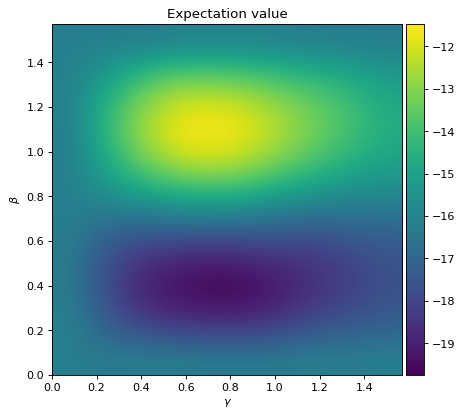

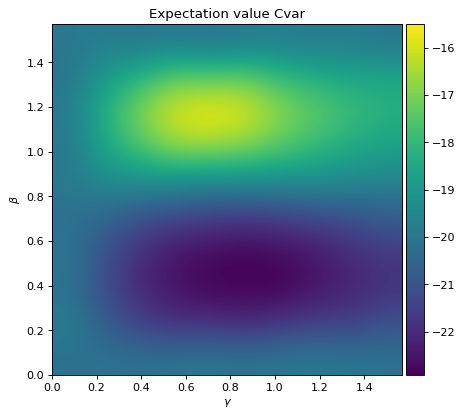

In [6]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoamc.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value CVaR')
im = ax.imshow(qaoamc_CVaR.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)


# Increasing depth

In [7]:
maxdepth=5
for i in range(maxdepth):
    qaoamc.increase_depth()
    qaoamc_CVaR.increase_depth()

cost(depth= 1 )= -19.845920386176818
cost(depth= 1 )= -22.848321803662024
cost(depth= 2 )= -21.250401043477112
cost(depth= 2 )= -23.884334193764094
cost(depth= 3 )= -22.040646245544124
cost(depth= 3 )= -24.42985229961318
cost(depth= 4 )= -22.53397611679458
cost(depth= 4 )= -24.85749481213673
cost(depth= 5 )= -22.66784925995828
cost(depth= 5 )= -25.09926540008879


# Plotting the approximation ratio

Below the approximation ratio is plotted for both methods. The CVaR method clearly outperforms the standard QAOA method.

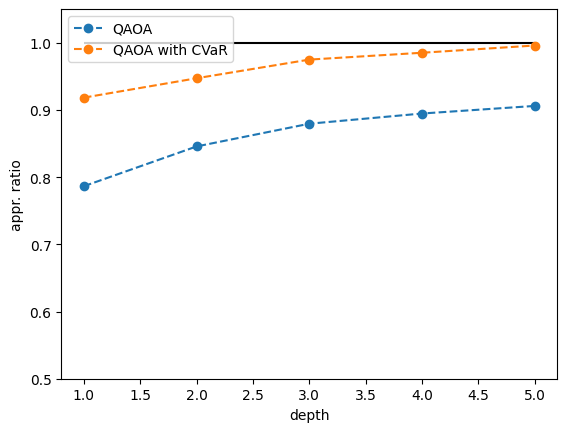

In [8]:
pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoamc.costval.values()))/mincost,'o--', label='QAOA')
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoamc_CVaR.costval.values()))/mincost,'o--', label='QAOA with CVaR')
pl.ylim(0.5,1.05)
_=pl.ylabel('appr. ratio')
_=pl.xlabel('depth')
_=pl.legend()